# Introduction
After spending 5 nights on the Royal Caribbean's Navigator of the Seas, where I spent most of my vacant afternoons in the casino trying out the Martingale betting strategy and had a net profit of \$30 from and initial \$100, I have this strong urge to test the success rate of this strategy by playing a large number of games. 

In this simulation, I assume that the outcome from the roulette wheel is uniformly random (no dealer has the expertise to maneuver the placement of the ball on the wheel. I will run 10000 games of 50 rounds with an initial capital of \$1000 and a minimum bet of \$5 and maximum of \$500.

Each number will be numbered as 1 to 36 with 0 as 37 and 00 as 38. Our strategy is playing for odd numbers in all rounds while employing the Martingale strategy.

p.s. The Martingale strategy - double your bets after you lose in each run.

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Bet Function

In [46]:
def bet(initial_amount, bet_amount):
    number_landed = np.random.randint(1,39)
    
    # 0 and 00
    if number_landed is 37 or number_landed is 38:
        return initial_amount - bet_amount
    
    # even numbers
    elif number_landed % 2:
        return initial_amount - bet_amount
    
    else:
        return initial_amount + bet_amount

## Normal Strategy

Always bet \$5 in each round

In [53]:
def normal(num_rounds = 50, initial_capital = 1000):
    bet_amount = 5
    for round in range(num_rounds):
        updated_capital = bet(initial_capital, bet_amount)
        initial_capital = updated_capital
        if initial_capital <= 0:
            break
    return initial_capital

## Martingale Strategy

Run simulation while we still have capital. We do "all in" in the case we do not have enough capital to double up.

In [93]:
def martingale(num_rounds = 50, initial_capital = 1000,
               max_bet = 500):
    bet_amount = 5
    num_con_loss = 0
    catastrophic = 0
    for round in range(num_rounds):
        updated_capital = bet(initial_capital, bet_amount)
        
        # double up if we lose or all in or cap at max bet
        if updated_capital < initial_capital:
            bet_amount *= 2
            bet_amount = min(bet_amount, updated_capital, max_bet)
            num_con_loss += 1
        
        # bet the minimum if we win
        else:
            bet_amount = 5
            num_con_loss = 0
        
        if num_con_loss is 6:
            catastrophic += 1
            num_con_loss = 0
        
        initial_capital = updated_capital
        
        # end round if we lose all
        if initial_capital <= 0:
            break
    return initial_capital, catastrophic

# Initial Simulation

## Normal Strategy

After playing 10000 games, our final amount seem to hover around \$985 which is equivalent to losing 3 rounds. Mathematically, we can understand why

$$\mathbb{E}[X] = 1000 + 50 \bigg (\frac{18}{38} \cdot 5 + \frac{20}{38} \cdot -5 \bigg) \approx 1000 - 14$$

And the number of games we did not lose money is less than half.

Average final amount: 986.830000
Number of times we actually profit or no loss: 4119


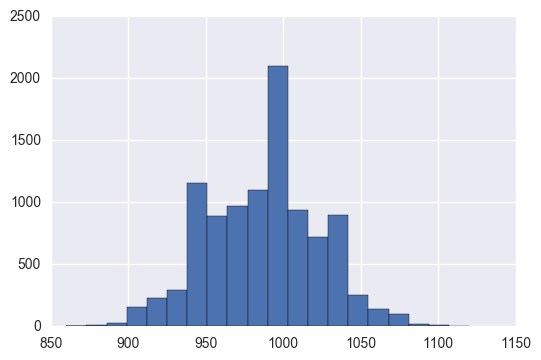

In [73]:
final_amount = []
for game in range(10000):
    final_amount.append(normal())
print("Average final amount: %f"%np.mean(final_amount))
print("Number of times we actually profit or no loss: %d"%np.sum(np.array(final_amount) >= 1000))
plt.hist(final_amount, bins=20)
plt.show()

## Martingale Strategy

We can see that the average final amount is less than \$1000 after playing 10000 games. That means on average we lose around \$50 per game of 50 rounds. This is actually worse off than the normal strategy. Although in 75% of the games, we actually avoided a loss, there were also a huge number of cases where we lost all of the initial capital.

Average final amount: 949.931500
Number of times we actually profit or no loss: 7577


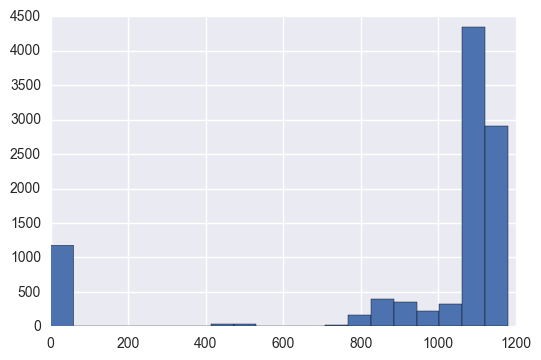

In [75]:
final_amount = []
catastrophic = []
for game in range(10000):
    final_amount.append(martingale()[0])
    catastrophic.append(martingale()[1])
print("Average final amount: %f"%np.mean(final_amount))
print("Number of times we actually profit or no loss: %d"%np.sum(np.array(final_amount) >= 1000))
plt.hist(final_amount, bins=20)
plt.show()

# Tuning for a Better Martingale Strategy

First, we have to understand the 'catastrophic' loss - where we lose the largest doubled bet we can have. In this case the 'catastrophic' loss is the point where we lose \$5 * 64 = \$320. Note that $64 = 2^6$. Hence, we want to see how often we lose 7 times in a row. Mathematically, the probability is 

$$\mathbb{P}[catastrophic] = \bigg(\frac{20}{38}\bigg)^7 \approx 1.12\%$$

From our simulation, it is about the same. Note that in 50 rounds of roulette, we have 43 opportunities for 7 consecutive losses.

In [79]:
print("Probability of catastrophic losses: %f"%(sum(catastrophic)/(10000*43)))
print("Number of times it happens in 10000 games: %d"%sum(catastrophic))

Probability of catastrophic losses: 0.010109
Number of times it happens in 10000 games: 4347


## More Initial Capital

In [104]:
initial_capitals = np.arange(500, 10000, 500)
table = pd.DataFrame(columns=["Initial Capital", "Average Losses", "Number of Games without Loss"])
for initial_capital in initial_capitals:
    final_amount = []
    for game in range(10000):
        final_amount.append(martingale(initial_capital=initial_capital)[0])
    table.loc[len(table)] = [initial_capital, initial_capital - np.mean(final_amount), 
                             np.sum(np.array(final_amount) >= initial_capital)]
table

,Initial Capital,Average Losses,Number of Games without Loss
0,500.0,41.0085,7072.0
1,1000.0,40.7570,7690.0
2,1500.0,57.0370,7619.0
3,2000.0,61.4415,7629.0
4,2500.0,60.8685,7583.0
5,3000.0,50.4010,7696.0
6,3500.0,68.2520,7630.0
7,4000.0,62.6805,7590.0
8,4500.0,66.8750,7570.0
9,5000.0,56.2180,7669.0


## More Rounds

It makes sense that as you play more rounds, you would lose more to the casino.

In [103]:
num_rounds = np.arange(50, 300, 10)
initial_capital = 1000
table = pd.DataFrame(columns=["Number of Rounds", "Average Losses", "Number of Games without Loss"])
for num_round in num_rounds:
    final_amount = []
    for game in range(10000):
        final_amount.append(martingale(num_rounds=num_round)[0])
    table.loc[len(table)] = [num_round, initial_capital - np.mean(final_amount), 
                             np.sum(np.array(final_amount) >= initial_capital)]
table

,Number of Rounds,Average Losses,Number of Games without Loss
0,50.0,50.9645,7597.0
1,60.0,62.5425,7210.0
2,70.0,71.9335,7163.0
3,80.0,82.2445,7101.0
4,90.0,90.4935,7036.0
5,100.0,100.3095,6968.0
6,110.0,115.0960,6835.0
7,120.0,119.8610,6729.0
8,130.0,133.7185,6580.0
9,140.0,129.6830,6542.0


## Effect of Minimum and Maximum Bets

The implementation of maximum bet by the casinos is something that gamblers cannot control. Let's consider hypothetically that we can control the amount of maximum bet to check if casinos actually set the maximum bet as such to maximize their profits i.e. maximize a gambler's losses. To test this, we let the gambler have a larger amount of wealth to start with. This is required so that the gambler's wealth would not limit the effect of maximum bets. 

Note that the casino that I visited had a minimum bet of \$5 and maximum bet of \$500. I want to know if \$500 as a maximum bet an optimization by the casino if a player uses the martingale strategy and \$5 is the minimum bet of the table.

In [102]:
max_bets = np.arange(200, 5000, 200)
initial_capital = 20000
table = pd.DataFrame(columns=["Maximum Bet", "Average Losses", "Number of Games without Loss"])
for max_bet in max_bets:
    final_amount = []
    for game in range(10000):
        final_amount.append(martingale(max_bet=max_bet, initial_capital=initial_capital)[0])
    table.loc[len(table)] = [max_bet, initial_capital-np.mean(final_amount), 
                             np.sum(np.array(final_amount) >= initial_capital)]
table

,Maximum Bet,Average Losses,Number of Games without Loss
0,200.0,54.6685,6373.0
1,400.0,56.5840,7536.0
2,600.0,70.8385,8409.0
3,800.0,65.8110,8472.0
4,1000.0,77.4080,8475.0
5,1200.0,77.2810,8928.0
6,1400.0,75.5175,9028.0
7,1600.0,85.0250,9038.0
8,1800.0,78.7385,9030.0
9,2000.0,62.4410,9064.0


It turns out that the value is set pretty arbitrarily.

Suppose there is no maximum bet i.e. maximum bet is $\infty$. Then we will almost certainly have a profit.

In [118]:
for game in range(10000):
        final_amount.append(martingale(max_bet=float('Inf'), initial_capital=20000)[0])
np.mean(final_amount)

14677.97875

# Conclusion

The martingale strategy does not guarantee you to win against any casinos due to the implementation of maximum betting rules. As you can already tell, the average payoff of the strategy is lower than no strategy at all. The martingale strategy allows you to have more cases of profit against the casino but one tend to lose big in some occasions. As a lesson, if you are not ready to lose your money, don't ever go to the casino. 